# Modèle de recommandations de films 

## 1. Imports

### 1.1 Libraries

In [1]:
# builtin
import os, time, sys, random

# data
import pandas as pd
import numpy as np
import requests
import math

# viz
import seaborn as sns
import matplotlib.pyplot as plt

# other
import warnings
warnings.filterwarnings("ignore")

### 1.2 Download and options

In [2]:
sns.set()

### 1.3 Loading data

In [3]:
# Env Perso
#df = pd.read_csv(r"C:\Users\derou\OneDrive\Bureau\DATA\PORTFOLIO\Recommandation de films\df_movies.csv")

# Env Vinci
df = pd.read_csv(r"C:\Users\melvin.derouk\Desktop\Data formation\Movies-Recommandations\df_movies.csv")

## 2. First tour

### 2.1 Display

In [4]:
df.drop(columns= "Unnamed: 0", inplace=True)

In [5]:
df.head(5)

,ID,Titre,Genre,Date de sortie,Synopsis,Note
0,507089,Five Nights at Freddy's,"Horreur, Mystère",2023-10-25,Un groupe d'animaux animatroniques interprète ...,8.4
1,951491,Saw X,"Horreur, Thriller",2023-09-26,"Dans l'espoir d'une guérison miraculeuse, John...",7.4
2,939335,Muzzle,"Action, Crime, Drame, Thriller",2023-09-29,"Jake Rosser, officier de police dans l'équipe ...",6.3
3,354912,Coco,"Familial, Animation, Fantastique, Musique, Com...",2017-10-27,"Depuis déjà plusieurs générations, la musique ...",8.2
4,968051,La Nonne : La Malédiction de Sainte-Lucie,"Horreur, Mystère, Thriller",2023-09-06,"En France, en 1956, un prêtre est assassiné da...",7.0


In [6]:
df.tail(5)

,ID,Titre,Genre,Date de sortie,Synopsis,Note
9995,88005,Jusqu'à ce que la fin du monde nous sépare,"Comédie, Drame, Romance, Aventure",2012-06-22,Que feriez-vous si la fin du monde arrivait da...,6.6
9996,586048,82년생 김지영,Drame,2019-10-23,Kim Ji‑young est une épouse aimante et une mèr...,7.4
9997,554590,Tod@s Caen,Comédie,2019-08-30,Adam et Mia sont deux stratèges qui veulent en...,7.8
9998,252164,Pressure,"Drame, Thriller",2015-06-04,Quatre plongeurs sont envoyés au fond de l'océ...,5.7
9999,553608,DJ Cendrillon,"Romance, Comédie",2019-02-28,"Cintia est une princesse moderne, elle est con...",6.5


In [7]:
df.sample(10)

,ID,Titre,Genre,Date de sortie,Synopsis,Note
2406,52451,Les Trois Mousquetaires,"Aventure, Action, Thriller",2011-08-31,L'histoire raconte les aventures de D'Artagnan...,5.8
6042,11071,Des monstres attaquent la ville,"Science-Fiction, Horreur",1954-06-16,"Après une explosion atomique, des fourmis géan...",6.8
5367,72358,Mille mots,"Drame, Comédie",2012-03-07,Et si vous n’aviez plus que mille mots à prono...,6.1
4143,631132,Goblin Slayer : Goblin's Crown,"Animation, Aventure, Action, Fantastique",2020-02-01,Goblin Slayer et son groupe se dirigent vers l...,7.4
7318,279229,Bleu saphir,"Fantastique, Romance, Drame",2014-08-14,Elle a hérité d'un don qu'elle a appris à maît...,7.2
6035,509874,Arnaqueurs Associés,"Crime, Comédie, Drame",2019-07-12,"Un cambrioleur, qui ne vole que des oeuvres d'...",5.9
621,284054,Black Panther,"Action, Aventure, Science-Fiction",2018-02-13,Après les événements qui se sont déroulés dans...,7.4
6633,15516,La Dernière Maison sur la gauche,"Horreur, Thriller",1972-08-30,"Pour fêter son dix-septième anniversaire, Mari...",5.9
6900,849,Krull,"Action, Aventure, Fantastique, Science-Fiction",1983-07-29,"Les épousailles de Colwyn, fils du roi Turold ...",6.0
4656,9272,Le Bon Fils,"Thriller, Drame, Horreur",1993-09-24,"Après le décès de sa mère, Mark Evans, 12 ans,...",6.7


### 2.2 Structure

In [8]:
df.shape

(10000, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              10000 non-null  int64  
 1   Titre           10000 non-null  object 
 2   Genre           9952 non-null   object 
 3   Date de sortie  9986 non-null   object 
 4   Synopsis        9053 non-null   object 
 5   Note            10000 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


In [10]:
df.nunique()

ID                9903
Titre             9674
Genre             2247
Date de sortie    5925
Synopsis          8963
Note                72
dtype: int64

### 2.3 NaN & duplicated

In [11]:
#NaN

df.isna().sum()

ID                  0
Titre               0
Genre              48
Date de sortie     14
Synopsis          947
Note                0
dtype: int64

In [12]:
df.isna().mean().sort_values()

ID                0.0000
Titre             0.0000
Note              0.0000
Date de sortie    0.0014
Genre             0.0048
Synopsis          0.0947
dtype: float64

<Axes: >

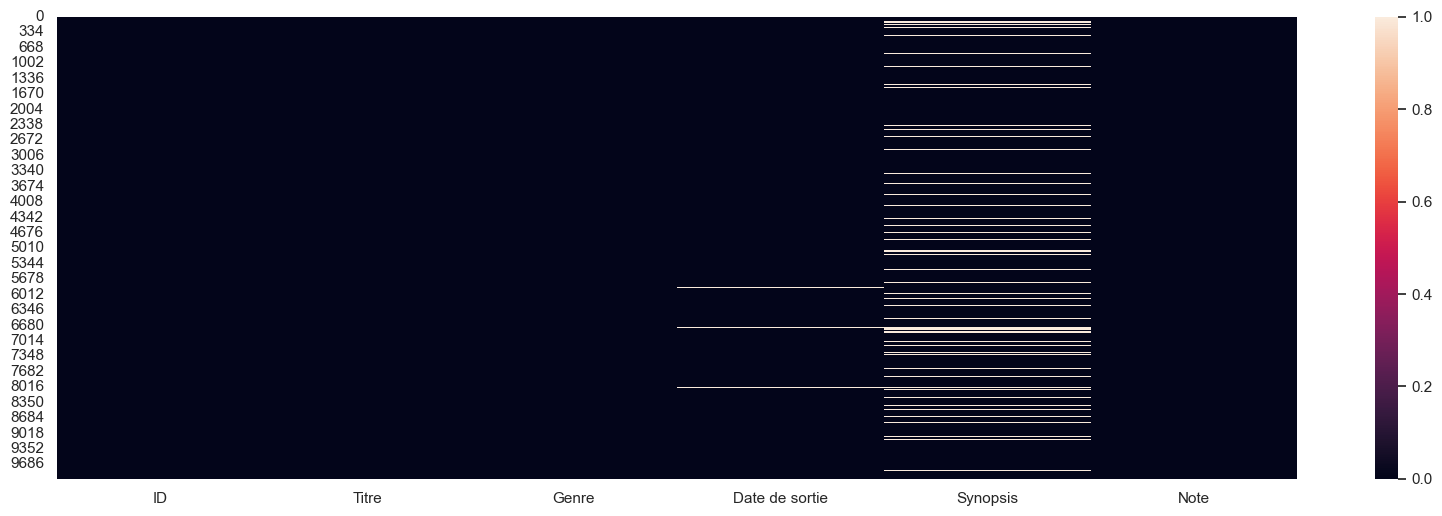

In [13]:
plt.figure(figsize=(20,6))
sns.heatmap(df.isna())

In [14]:
# Duplicated rows

df.duplicated().sum()

97

In [15]:
# doublons par colonne

for col in df.columns:
    n = df.duplicated(subset=col).sum()
    print(f"column : {col} -> duplicated : {n}")

column : ID -> duplicated : 97
column : Titre -> duplicated : 326
column : Genre -> duplicated : 7752
column : Date de sortie -> duplicated : 4074
column : Synopsis -> duplicated : 1036
column : Note -> duplicated : 9928


In [16]:
# isolement des lignes avec doublons dans "Titre"

idx = df.duplicated(subset=["Titre"], keep=False)
dbl_df = df[idx]

dbl_df.sort_values("Titre")

,ID,Titre,Genre,Date de sortie,Synopsis,Note
1246,9378,13 fantômes,"Horreur, Thriller",2001-10-26,"Arthur Kriticos, un enseignant veuf, hérite du...",6.2
1131,9378,13 fantômes,"Horreur, Thriller",2001-10-26,"Arthur Kriticos, un enseignant veuf, hérite du...",6.2
5498,118612,After,"Mystère, Thriller",2012-08-27,NaN,5.5
6272,163733,After,Romance,2013-01-30,"Paris, la nuit, une femme rencontre un homme. ...",5.9
3620,390051,Aftermath,"Drame, Thriller",2017-02-28,Après avoir perdu sa femme et son enfant dans ...,5.7
...,...,...,...,...,...,...
1202,987507,バッドシティ,"Action, Crime",2022-07-05,NaN,6.9
1224,473924,동창회의 목적: 더 비기닝,"Comédie, Romance",2017-02-02,NaN,8.2
1163,473924,동창회의 목적: 더 비기닝,"Comédie, Romance",2017-02-02,NaN,8.2
1281,995612,여자친구의 맛 2,Romance,2020-11-13,NaN,3.0


### 2.4 Data inspection

In [17]:
df.describe(include='all')

,ID,Titre,Genre,Date de sortie,Synopsis,Note
count,1.000000e+04,10000,9952,9986,9053,10000.000000
unique,NaN,9674,2247,5925,8963,NaN
top,NaN,La Planète des singes,Drame,2023-11-01,Dans un lieu de villégiature top secret réserv...,NaN
freq,NaN,4,555,53,2,NaN
mean,3.105742e+05,NaN,NaN,NaN,NaN,6.360150
std,3.568495e+05,NaN,NaN,NaN,NaN,1.434617
min,5.000000e+00,NaN,NaN,NaN,NaN,0.000000
25%,1.132975e+04,NaN,NaN,NaN,NaN,6.000000
50%,1.137705e+05,NaN,NaN,NaN,NaN,6.600000
75%,5.542925e+05,NaN,NaN,NaN,NaN,7.200000


## 3. Cleaning

### 3.1 NaN

In [18]:
df.dropna(inplace=True)

In [19]:
df = df.drop_duplicates(subset='Synopsis')


In [20]:
#remplacement des valeurs manquantes en NAT dans la colonne date

df['Date de sortie'] = pd.to_datetime(df['Date de sortie'], errors='coerce')

### 3.2 Drop duplicated

In [21]:
df.drop_duplicates(inplace=True)

## 4. Exploratory Data Analysis

### 4.1 Genre

In [22]:
#certains genres dans la colonne "Genre" sont stockés sous forme de chaînes de caractères plutôt que de listes

df['Genre'] = df['Genre'].apply(lambda x: x.split(", ") if isinstance(x, str) else x)

In [23]:
genres_expanded = df['Genre'].explode()

genre_counts = genres_expanded.value_counts()

df_genre_counts = genre_counts.reset_index()
df_genre_counts.columns = ['Genre', 'Nombre de films']

df_genre_counts

,Genre,Nombre de films
0,Drame,3449
1,Comédie,2779
2,Action,2596
3,Thriller,2445
4,Aventure,1773
5,Horreur,1378
6,Romance,1346
7,Crime,1276
8,Fantastique,1245
9,Familial,1229


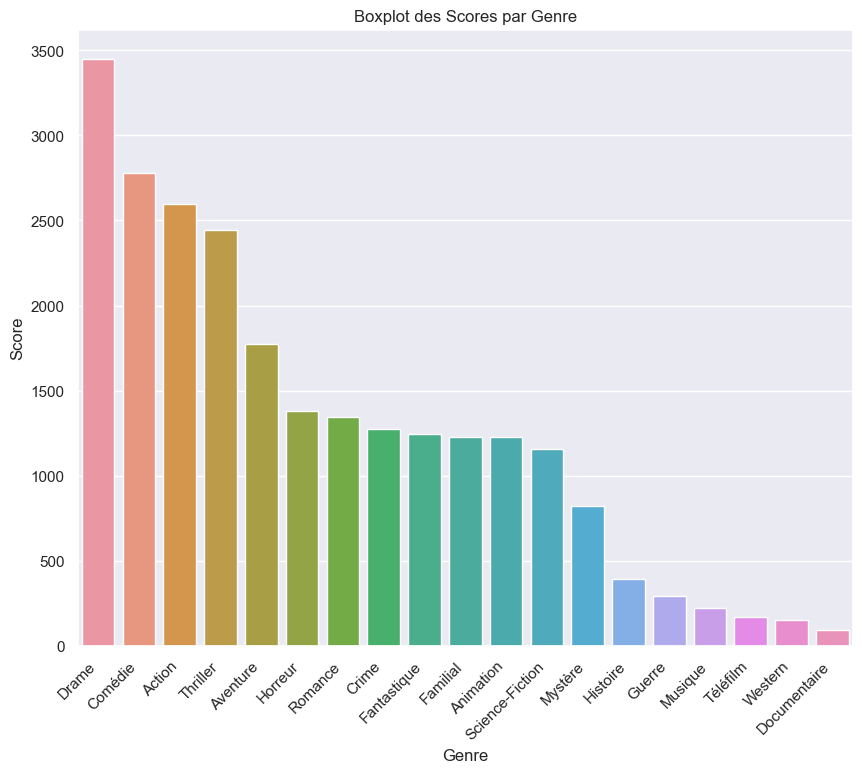

In [24]:
plt.figure(figsize=(10,8))

sns.barplot(x='Genre', y='Nombre de films', data=df_genre_counts)

plt.title('Boxplot des Scores par Genre')
plt.xlabel('Genre')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')

plt.show()

### 4.2 Date de sortie

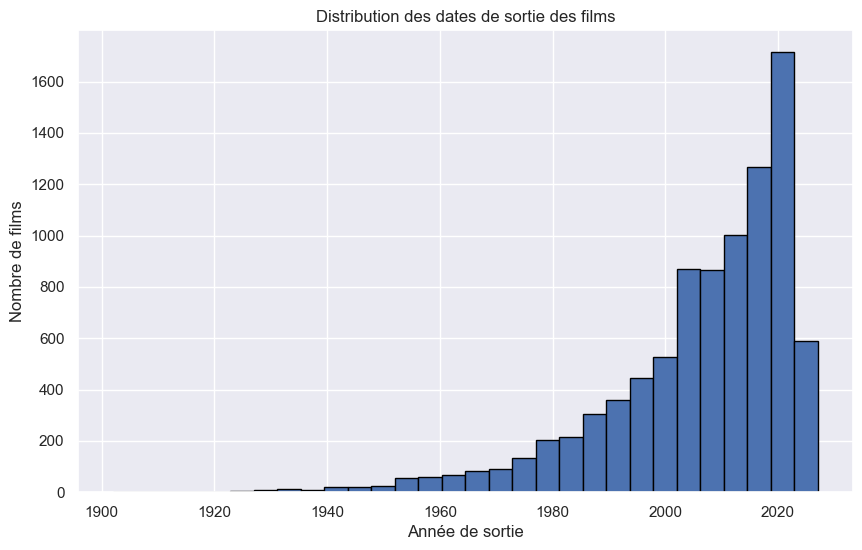

In [25]:
df['Date de sortie'] = pd.to_datetime(df['Date de sortie'])

plt.figure(figsize=(10,6))
df['Date de sortie'].dt.year.hist(bins=30, edgecolor='black')
plt.title('Distribution des dates de sortie des films')
plt.xlabel('Année de sortie')
plt.ylabel('Nombre de films')
plt.show()


In [26]:
# retrait des films qui ne sont pas encore sortis (> 01/11/2023)
cutoff_date = pd.Timestamp('2023-11-01')
df = df[df["Date de sortie"] < cutoff_date]

df.reset_index(drop=True, inplace=True)

### 4.3 Note

In [27]:
df.Note.value_counts(normalize=True)

6.8    0.047678
6.6    0.047453
6.5    0.047341
7.0    0.046891
6.7    0.046666
         ...   
2.7    0.000112
9.0    0.000112
8.8    0.000112
3.2    0.000112
3.3    0.000112
Name: Note, Length: 63, dtype: float64

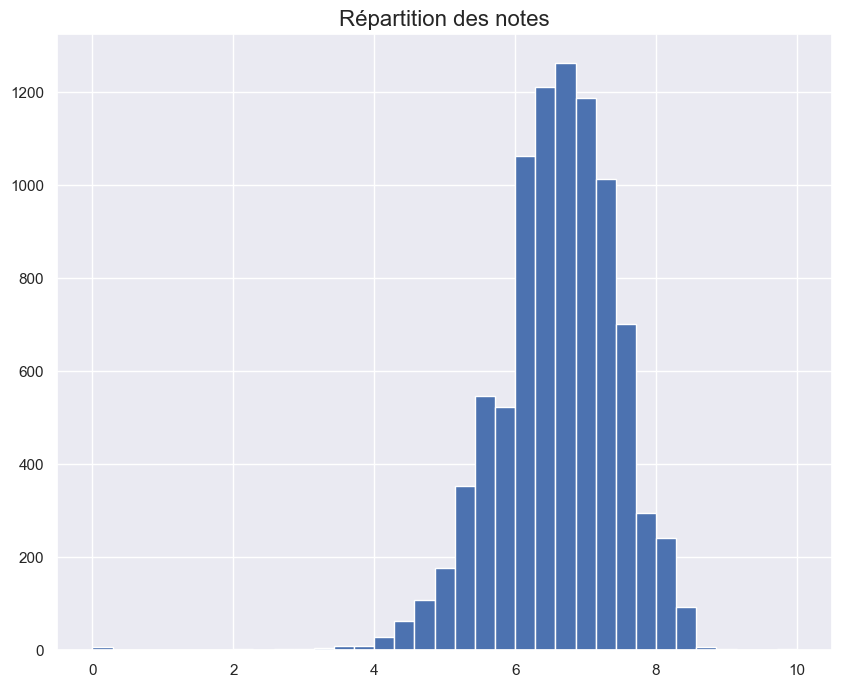

In [28]:
plt.figure(figsize=(10,8))

df['Note'].hist(bins=35)

plt.title("Répartition des notes", size=16)
plt.show()

In [29]:
df[df['Note']==0]

,ID,Titre,Genre,Date de sortie,Synopsis,Note
6006,895549,Insubmersible,"[Drame, Histoire]",2023-10-18,"L'histoire vraie de la nageuse américaine, Dia...",0.0
6428,1146302,Sly : Stallone par Stallone,[Documentaire],2023-09-16,Sa passion pour le cinéma est née du besoin d'...,0.0
7006,790459,Fingernails,"[Romance, Science-Fiction, Drame, Comédie]",2023-10-27,Comment avoir la certitude qu'on a trouvé l'am...,0.0
7041,1183722,Le Saut du diable 2 : le sentier des loups,"[Action, Aventure, Crime, Téléfilm]",2023-10-26,"Paul Vilar, ancien des Forces Spéciales, avec ...",0.0
7446,1002459,El rapto,[Drame],2023-10-26,"Buenos Aires, années 80. Après le retour de la...",0.0
7477,1185135,Expositions sur grand écran: Klimt et Le Baiser,[Documentaire],2023-10-30,Le Baiser de Gustav Klimt est l’un des tableau...,0.0
8384,1195115,Candice Renoir : Des bonbons ou la vie,"[Téléfilm, Thriller, Drame, Comédie]",2023-10-30,"À l'approche d'Halloween, Candice accompagne A...",0.0


### 4.4 Synopsis

In [30]:
df.Synopsis.apply(lambda i : len(i))

0       226
1       373
2       272
3       627
4       343
       ... 
8888    623
8889    361
8890    366
8891    513
8892    620
Name: Synopsis, Length: 8893, dtype: int64

<Axes: >

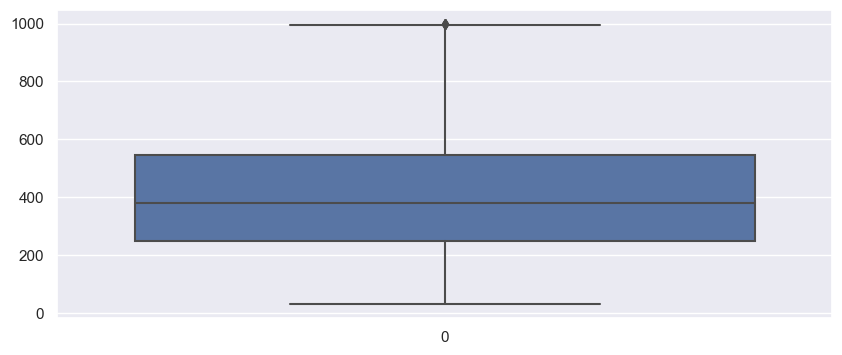

In [31]:
tmp = df.Synopsis.str.len()

plt.figure(figsize=(10,4))
sns.boxplot(tmp)

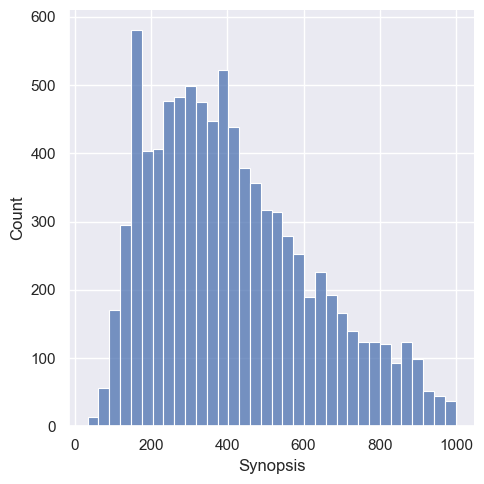

In [32]:
sns.displot(tmp)

In [33]:
df['len_txt'] = tmp
df.head(5)

,ID,Titre,Genre,Date de sortie,Synopsis,Note,len_txt
0,507089,Five Nights at Freddy's,"[Horreur, Mystère]",2023-10-25,Un groupe d'animaux animatroniques interprète ...,8.4,226
1,951491,Saw X,"[Horreur, Thriller]",2023-09-26,"Dans l'espoir d'une guérison miraculeuse, John...",7.4,373
2,939335,Muzzle,"[Action, Crime, Drame, Thriller]",2023-09-29,"Jake Rosser, officier de police dans l'équipe ...",6.3,272
3,354912,Coco,"[Familial, Animation, Fantastique, Musique, Co...",2017-10-27,"Depuis déjà plusieurs générations, la musique ...",8.2,627
4,968051,La Nonne : La Malédiction de Sainte-Lucie,"[Horreur, Mystère, Thriller]",2023-09-06,"En France, en 1956, un prêtre est assassiné da...",7.0,343


In [34]:
df.sort_values("len_txt").head(10)

,ID,Titre,Genre,Date de sortie,Synopsis,Note,len_txt
3945,36362,Le Roi des rois,"[Drame, Fantastique]",1961-10-11,Péplum retraçant la vie de Jésus.,7.1,33
6306,347183,Haikyu !! - Film 1 - Un début et une fin,"[Animation, Comédie, Drame]",2015-07-03,Premier Haikyuu !! film récapitulatif. Ld,8.5,41
7591,44363,Frozen,[Thriller],2010-02-05,Trois skieurs sont bloqués sur un télésiège...,6.0,46
4992,876716,Ciao Alberto,"[Animation, Comédie, Familial, Fantastique]",2021-11-12,"Spin-off de Luca, des studios d’animation Pixar.",7.5,48
5395,336445,Army of One,[Comédie],2016-11-04,Un homme décide de traquer seul Oussama Ben La...,5.2,50
5060,52212,Miranda,"[Comédie, Romance]",1985-10-15,Miranda cherche un mari et essaye plusieurs ho...,5.2,51
6039,706972,Narco Sub,[Action],2021-01-22,Un homme deviendra un criminel pour sauver sa ...,6.6,54
6476,286554,Aventure d'un soir,"[Romance, Comédie]",2014-09-26,Un couple se retrouve pris au piège lors d'une...,6.4,55
6066,184341,Hands of Stone,[Drame],2016-08-26,Retour sur la carrière du boxeur panaméen Robe...,6.5,56
2632,12110,"Dracula, mort et heureux de l’être","[Comédie, Horreur]",1995-12-22,"Le ""Dracula"" de Bram Stoker revu et corrigé pa...",6.0,59


In [35]:
df.sort_values("len_txt").tail(10)

,ID,Titre,Genre,Date de sortie,Synopsis,Note,len_txt
1391,44912,Green Lantern,"[Aventure, Action, Thriller, Science-Fiction]",2011-06-14,"Dans un univers aussi vaste que mystérieux, un...",5.2,993
5158,1683,Les Châtiments,[Horreur],2007-04-05,Katherine Winter a quitté l'habit de missionna...,5.7,993
3902,302401,Snowden,"[Drame, Histoire, Crime, Thriller]",2016-09-15,"Patriote idéaliste et enthousiaste, le jeune E...",7.1,993
2590,1493,Miss Détective,"[Comédie, Crime, Action]",2000-12-22,L’agent Gracie Hart travaille dans un commando...,6.5,993
7724,43258,La Loi du Seigneur,"[Drame, Histoire, Guerre, Familial, Comédie]",1956-11-25,La famille Birdwell vit dans l'Indiana en 1862...,6.6,994
6725,213681,Les Cerveaux,"[Action, Comédie, Crime]",2016-09-29,La vie de David Ghantt n’a rien de compliqué. ...,5.7,995
7788,13384,Kes,[Drame],1970-04-03,Billy Casper vit dans une petite ville minière...,7.5,998
7421,6878,L'Incroyable Voyage,"[Aventure, Comédie, Familial]",1993-02-03,"Le film raconte les aventures de Shadow, un go...",6.9,998
4179,9550,Le Secret des poignards volants,"[Aventure, Drame, Action]",2004-05-19,"En cette année 859, la Chine est ravagée par l...",7.3,998
3593,618344,Justice League Dark: Apokolips War,"[Animation, Action, Science-Fiction]",2020-05-05,"Suite à ses deux invasions ratées de la Terre,...",8.3,999


### 4.5 Multivariate analysis

In [36]:
corr = df.corr()
corr

,ID,Note,len_txt
ID,1.000000,-0.015686,-0.247123
Note,-0.015686,1.000000,0.067133
len_txt,-0.247123,0.067133,1.000000


<Axes: >

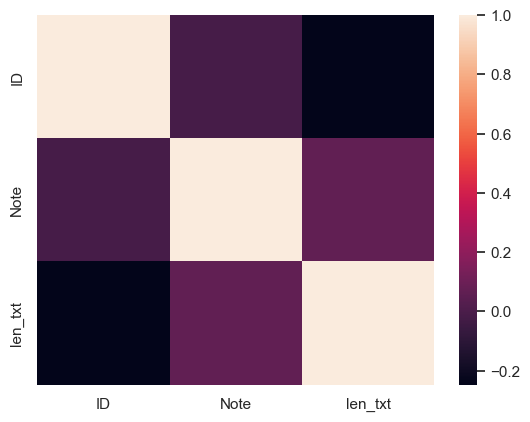

In [37]:
sns.heatmap(corr)

In [38]:
df.to_csv("df_movies_cleaned.csv", index=False)